In [1]:
import numpy as np
import tensorflow as tf

np.random.seed(30)
tf.random.set_seed(30)

from tensorflow.keras.models import load_model
from tensorflow import keras
from tensorflow.keras.applications.vgg16 import VGG16 , preprocess_input

In [191]:
vgg16 = VGG16( weights='imagenet', include_top=False, input_shape=(224,224,3))

In [192]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [193]:
vgg16.trainable=False

myModel = tf.keras.Sequential()
myModel.add (vgg16)
myModel.add (tf.keras.layers.Flatten())
myModel.add (keras.layers.Dense(2,activation='relu'))
myModel.add (keras.layers.Dense(5, activation='relu'))
myModel.add (keras.layers.Dense(1,activation='sigmoid'))

In [194]:
myModel.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_13 (Flatten)        (None, 25088)             0         
                                                                 
 dense_39 (Dense)            (None, 2)                 50178     
                                                                 
 dense_40 (Dense)            (None, 5)                 15        
                                                                 
 dense_41 (Dense)            (None, 1)                 6         
                                                                 
Total params: 14,764,887
Trainable params: 50,199
Non-trainable params: 14,714,688
_________________________________________________________________


In [195]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
myModel.compile(optimizer=opt,
               loss='binary_crossentropy',
               metrics=["accuracy"])

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# without augmentation

In [197]:
train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

In [198]:
No_train_samples=203
No_test_samples=50
epochs=30
batch_size=32
train_dir='train'
test_dir='test'

In [199]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size=(224,224),
                                                   batch_size=batch_size,
                                                   class_mode='binary'
                                                   ,seed=100)

test_generator = test_datagen.flow_from_directory(test_dir,
                                                 target_size=(224,224),
                                                 batch_size=batch_size,
                                                 class_mode='binary',
                                                 shuffle=False,
                                                 seed=100)

Found 203 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


In [200]:
temp = tf.keras.callbacks.ModelCheckpoint(
    filepath="presentOne",
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

temp2 = tf.keras.callbacks.EarlyStopping(
    monitor="accuracy",
    patience=10)

In [201]:
history = myModel.fit(train_generator, 
                               epochs=epochs,
                               steps_per_epoch=No_train_samples//batch_size,
                               validation_data=test_generator, callbacks=[temp2, temp])

Epoch 1/30
6/6 [==============================] - ETA: 0s - loss: 0.6053 - accuracy: 0.6354

INFO:tensorflow:Assets written to: presentOne\assets


INFO:tensorflow:Assets written to: presentOne\assets


6/6 [==============================] - 11s 2s/step - loss: 0.6053 - accuracy: 0.6354 - val_loss: 0.6019 - val_accuracy: 0.7200
Epoch 2/30
6/6 [==============================] - 2s 411ms/step - loss: 0.4990 - accuracy: 0.8012 - val_loss: 0.5933 - val_accuracy: 0.6800
Epoch 3/30
6/6 [==============================] - ETA: 0s - loss: 0.5129 - accuracy: 0.7135

INFO:tensorflow:Assets written to: presentOne\assets


INFO:tensorflow:Assets written to: presentOne\assets


6/6 [==============================] - 10s 2s/step - loss: 0.5129 - accuracy: 0.7135 - val_loss: 0.5807 - val_accuracy: 0.8000
Epoch 4/30
6/6 [==============================] - ETA: 0s - loss: 0.5094 - accuracy: 0.8363

INFO:tensorflow:Assets written to: presentOne\assets


INFO:tensorflow:Assets written to: presentOne\assets


6/6 [==============================] - 9s 2s/step - loss: 0.5094 - accuracy: 0.8363 - val_loss: 0.5558 - val_accuracy: 0.8600
Epoch 5/30
6/6 [==============================] - 3s 414ms/step - loss: 0.4447 - accuracy: 0.7895 - val_loss: 0.5859 - val_accuracy: 0.8000
Epoch 6/30
6/6 [==============================] - 2s 447ms/step - loss: 0.4076 - accuracy: 0.8012 - val_loss: 0.5416 - val_accuracy: 0.7600
Epoch 7/30
6/6 [==============================] - 3s 416ms/step - loss: 0.4155 - accuracy: 0.8070 - val_loss: 0.5495 - val_accuracy: 0.7600
Epoch 8/30
6/6 [==============================] - 2s 447ms/step - loss: 0.3488 - accuracy: 0.8538 - val_loss: 0.6594 - val_accuracy: 0.7600
Epoch 9/30
6/6 [==============================] - 2s 448ms/step - loss: 0.3620 - accuracy: 0.8713 - val_loss: 0.5878 - val_accuracy: 0.8200
Epoch 10/30
6/6 [==============================] - 2s 412ms/step - loss: 0.3319 - accuracy: 0.9298 - val_loss: 0.5602 - val_accuracy: 0.8400
Epoch 11/30
6/6 [================

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

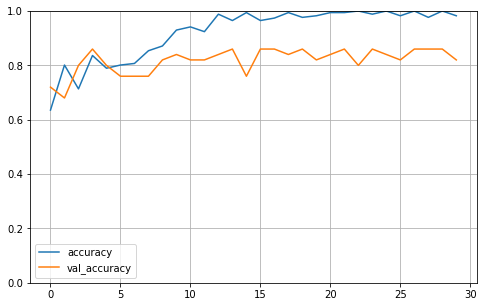

In [202]:
pd.DataFrame ( history.history ).drop(columns=['loss','val_loss']).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show
plt.savefig(r'presentOne.png', dpi=300)

In [26]:
from sklearn.metrics import classification_report, confusion_matrix

def rounder(a):
    k=[]
    for t in range(0,len(a)):
       a[t][0]=round(a[t][0])
    return np.array(a)

In [27]:
temp = load_model ('presentOne')

In [28]:
print('acc: ', temp.evaluate(test_generator))

predictions = temp.predict_generator(test_generator, steps=len(test_generator))
y=rounder(predictions)
print('scores: ')
report = classification_report (y_true= test_generator.classes, y_pred=y.reshape(50), \
                                target_names=test_generator.class_indices)
print(report)

2/2 [==============================] - 1s 240ms/step - loss: 0.5288 - accuracy: 0.8600
acc:  [0.5288028120994568, 0.8600000143051147]


C:\Users\Arash_desktop\AppData\Local\Temp\ipykernel_8220\1140147226.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = temp.predict_generator(test_generator, steps=len(test_generator))


scores: 
              precision    recall  f1-score   support

     class_a       0.79      1.00      0.89        27
     class_b       1.00      0.70      0.82        23

    accuracy                           0.86        50
   macro avg       0.90      0.85      0.85        50
weighted avg       0.89      0.86      0.86        50



# with augmentation

In [127]:
train_datagen2 = ImageDataGenerator(rescale=1./255,
                                    rotation_range=15,
                                    width_shift_range=0.1,
                                    height_shift_range=0.1,
                                    shear_range=0.1,
                                    brightness_range=[0.5, 1.5],
                                    horizontal_flip=True,
                                    vertical_flip=True,
                                   preprocessing_function=preprocess_input)

test_datagen2 = ImageDataGenerator(preprocessing_function=preprocess_input)

In [132]:
train_generator2 = train_datagen2.flow_from_directory(train_dir,
                                                   target_size=(224,224),
                                                   batch_size=batch_size,
                                                   class_mode='binary'
                                                   , seed=100)

test_generator2 = test_datagen2.flow_from_directory(test_dir,
                                                 target_size=(224,224),
                                                 batch_size=batch_size,
                                                 class_mode='binary',
                                                 shuffle=False,
                                                   seed=100)

Found 203 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


In [133]:
temp3 = tf.keras.callbacks.ModelCheckpoint(
    filepath="presentTwo",
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

temp4 = tf.keras.callbacks.EarlyStopping(
    monitor="accuracy",
    patience=10)

In [134]:
history2 = myModel.fit_generator(train_generator2, 
                        epochs=epochs,
                    steps_per_epoch=No_train_samples//batch_size,
                   validation_data=test_generator2, callbacks=[temp3, temp4])

C:\Users\Arash_desktop\AppData\Local\Temp\ipykernel_8220\1042615551.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history2 = myModel.fit_generator(train_generator2,


Epoch 1/30
6/6 [==============================] - ETA: 0s - loss: 0.6087 - accuracy: 0.6491

INFO:tensorflow:Assets written to: presentTwo\assets


INFO:tensorflow:Assets written to: presentTwo\assets


6/6 [==============================] - 13s 2s/step - loss: 0.6087 - accuracy: 0.6491 - val_loss: 0.7044 - val_accuracy: 0.5400
Epoch 2/30
6/6 [==============================] - ETA: 0s - loss: 0.5482 - accuracy: 0.6316

INFO:tensorflow:Assets written to: presentTwo\assets


INFO:tensorflow:Assets written to: presentTwo\assets


6/6 [==============================] - 11s 2s/step - loss: 0.5482 - accuracy: 0.6316 - val_loss: 1.3651 - val_accuracy: 0.8200
Epoch 3/30
6/6 [==============================] - 4s 636ms/step - loss: 0.5426 - accuracy: 0.7836 - val_loss: 2.6699 - val_accuracy: 0.7400
Epoch 4/30
6/6 [==============================] - 4s 634ms/step - loss: 0.5046 - accuracy: 0.8012 - val_loss: 1.1276 - val_accuracy: 0.8000
Epoch 5/30
6/6 [==============================] - ETA: 0s - loss: 0.5122 - accuracy: 0.8012

INFO:tensorflow:Assets written to: presentTwo\assets


INFO:tensorflow:Assets written to: presentTwo\assets


6/6 [==============================] - 11s 2s/step - loss: 0.5122 - accuracy: 0.8012 - val_loss: 0.7337 - val_accuracy: 0.8400
Epoch 6/30
6/6 [==============================] - ETA: 0s - loss: 0.5090 - accuracy: 0.7836

INFO:tensorflow:Assets written to: presentTwo\assets


INFO:tensorflow:Assets written to: presentTwo\assets


6/6 [==============================] - 11s 2s/step - loss: 0.5090 - accuracy: 0.7836 - val_loss: 0.7741 - val_accuracy: 0.8800
Epoch 7/30
6/6 [==============================] - ETA: 0s - loss: 0.4616 - accuracy: 0.8187

INFO:tensorflow:Assets written to: presentTwo\assets


INFO:tensorflow:Assets written to: presentTwo\assets


6/6 [==============================] - 11s 2s/step - loss: 0.4616 - accuracy: 0.8187 - val_loss: 0.5030 - val_accuracy: 0.9000
Epoch 8/30
6/6 [==============================] - 4s 592ms/step - loss: 0.4789 - accuracy: 0.8363 - val_loss: 0.6324 - val_accuracy: 0.8800
Epoch 9/30
6/6 [==============================] - 4s 644ms/step - loss: 0.4570 - accuracy: 0.7895 - val_loss: 0.6735 - val_accuracy: 0.8600
Epoch 10/30
6/6 [==============================] - 4s 637ms/step - loss: 0.4765 - accuracy: 0.8246 - val_loss: 0.5497 - val_accuracy: 0.8600
Epoch 11/30
6/6 [==============================] - ETA: 0s - loss: 0.4557 - accuracy: 0.8246

INFO:tensorflow:Assets written to: presentTwo\assets


INFO:tensorflow:Assets written to: presentTwo\assets


6/6 [==============================] - 11s 2s/step - loss: 0.4557 - accuracy: 0.8246 - val_loss: 0.5055 - val_accuracy: 0.9400
Epoch 12/30
6/6 [==============================] - 4s 631ms/step - loss: 0.4413 - accuracy: 0.8713 - val_loss: 0.7911 - val_accuracy: 0.8600
Epoch 13/30
6/6 [==============================] - 4s 643ms/step - loss: 0.4358 - accuracy: 0.8129 - val_loss: 0.6230 - val_accuracy: 0.9000
Epoch 14/30
6/6 [==============================] - 4s 641ms/step - loss: 0.4231 - accuracy: 0.8596 - val_loss: 0.8491 - val_accuracy: 0.9000
Epoch 15/30
6/6 [==============================] - 4s 687ms/step - loss: 0.4159 - accuracy: 0.8177 - val_loss: 0.7893 - val_accuracy: 0.9000
Epoch 16/30
6/6 [==============================] - 4s 717ms/step - loss: 0.4135 - accuracy: 0.8655 - val_loss: 1.3159 - val_accuracy: 0.8200
Epoch 17/30
6/6 [==============================] - 4s 682ms/step - loss: 0.4414 - accuracy: 0.8385 - val_loss: 0.6280 - val_accuracy: 0.9200
Epoch 18/30
6/6 [==========

INFO:tensorflow:Assets written to: presentTwo\assets


INFO:tensorflow:Assets written to: presentTwo\assets


6/6 [==============================] - 11s 2s/step - loss: 0.3969 - accuracy: 0.8713 - val_loss: 0.4967 - val_accuracy: 0.9600
Epoch 19/30
6/6 [==============================] - 4s 632ms/step - loss: 0.4029 - accuracy: 0.8655 - val_loss: 0.4611 - val_accuracy: 0.9600
Epoch 20/30
6/6 [==============================] - 4s 650ms/step - loss: 0.3808 - accuracy: 0.8596 - val_loss: 0.4133 - val_accuracy: 0.9400
Epoch 21/30
6/6 [==============================] - 4s 680ms/step - loss: 0.3969 - accuracy: 0.8698 - val_loss: 0.5445 - val_accuracy: 0.9400
Epoch 22/30
6/6 [==============================] - 4s 609ms/step - loss: 0.3842 - accuracy: 0.8655 - val_loss: 0.4070 - val_accuracy: 0.9600


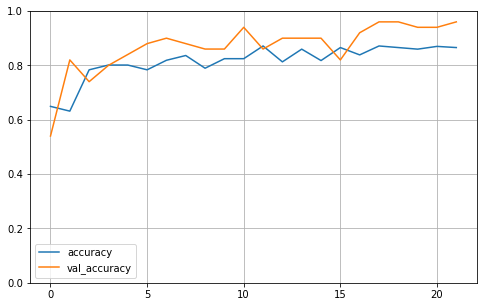

In [167]:
pd.DataFrame ( history2.history ).drop(columns=['loss','val_loss']).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show
plt.savefig(r'presentTwo.png', dpi=300)

In [163]:
temp = load_model ('presentTwo')

In [164]:
print('acc: ', temp.evaluate(test_generator2))

predictions = temp.predict_generator(test_generator2, steps=len(test_generator2))
y=rounder(predictions)
print('scores: ')
report = classification_report (y_true= test_generator2.classes, y_pred=y.reshape(50), \
                                target_names=test_generator2.class_indices)
print(report)

2/2 [==============================] - 1s 239ms/step - loss: 0.4967 - accuracy: 0.9600
acc:  [0.4967004656791687, 0.9599999785423279]


C:\Users\Arash_desktop\AppData\Local\Temp\ipykernel_8220\1616054583.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = temp.predict_generator(test_generator2, steps=len(test_generator2))


scores: 
              precision    recall  f1-score   support

     class_a       0.96      0.96      0.96        27
     class_b       0.96      0.96      0.96        23

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



In [15]:
#test


In [57]:
dgen = ImageDataGenerator(
                        rotation_range=15,
                        width_shift_range=0.1,
                        height_shift_range=0.1,
                        shear_range=0.1,
                        brightness_range=[0.5, 1.5],
                        horizontal_flip=True,
                        vertical_flip=True)

In [58]:
from numpy import expand_dims
from matplotlib import pyplot as plt
import numpy as np
from tensorflow.keras.utils import img_to_array
from keras.preprocessing import image

In [59]:
myimage = tf.keras.utils.load_img("yes.jpg",target_size = (224,224))
data = img_to_array(myimage)
samples = data.reshape(1,224,224,3)

In [60]:
it = dgen.flow(samples, batch_size=1)
le = []

for i in range(6):
    batch = it.next()
    image = batch[0].astype('uint8')
    le.append(image)

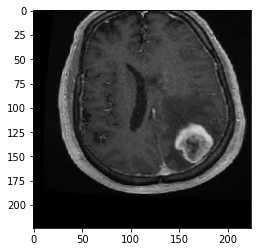

In [61]:
plt.imshow(le[0])

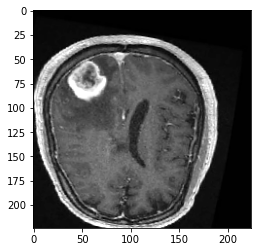

In [62]:
plt.imshow(le[1])

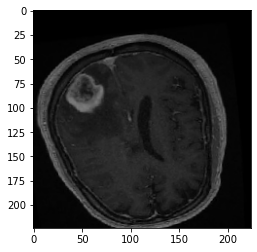

In [63]:
plt.imshow(le[2])

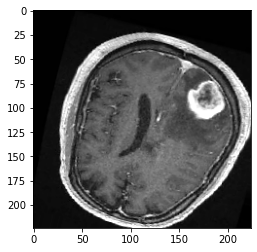

In [64]:
plt.imshow(le[3])

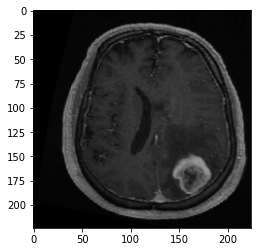

In [65]:
plt.imshow(le[4])

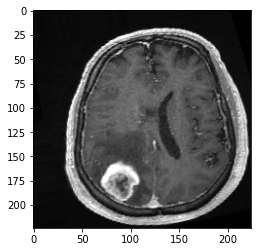

In [66]:
plt.imshow(le[5])